<a href="https://colab.research.google.com/github/aditya-chavda/TSF-Internship-Tasks/blob/master/Task3_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: To Explore Unsupervised Machine Learning 
## K-means Clustering using Sckit-learn
Description: In this task, from the given ‘Iris’ dataset, we will predict the optimum number of clusters and represent it visually.

## Author: Aditya Chavda
####Date created: 16th September, 2020
This notebook is created to complete the above stated task given as part of data science internship under The Sparks Foundation.

####Importing Libraries and the Data

In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
#Reading from the provided dataset
df = pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


####Preparing and plotting the Data

In [ ]:
x = pd.DataFrame(df.iloc[:, [1,2,3,4]], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = pd.DataFrame(df.iloc[:, [5]], columns=['Species'])
y['Species'] = y['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


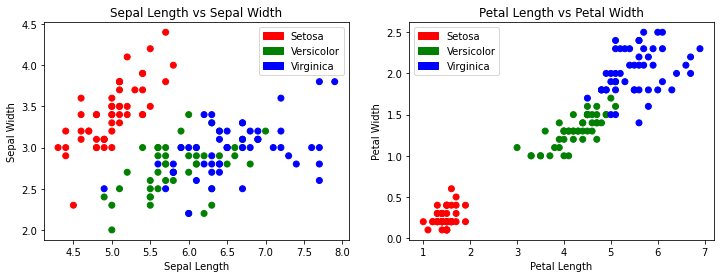

In [ ]:
plt.figure(figsize=(12,4))
colors = np.array(['red', 'green', 'blue'])
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

plt.subplot(1, 2, 1)
plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], 
            c = colors[y['Species']])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], 
            c = colors[y['Species']])
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

####Using Elbow method to Find Optimal Number of Clusters


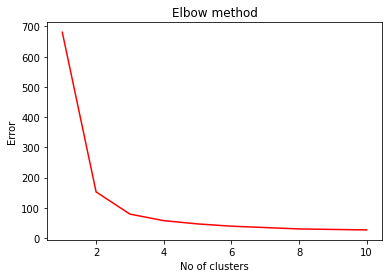

In [ ]:
err =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    err.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), err,c='r')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

This graph generally ends up shaped like an elbow, hence its name. The output graph of the Elbow method is shown above. Note that the shape of elbow is approximately formed at k=3.

In [ ]:
kmeans3 = KMeans(n_clusters=3)
y_k3 = kmeans3.fit_predict(x)
y_k3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
kmeans3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

####Visualising the Clusters

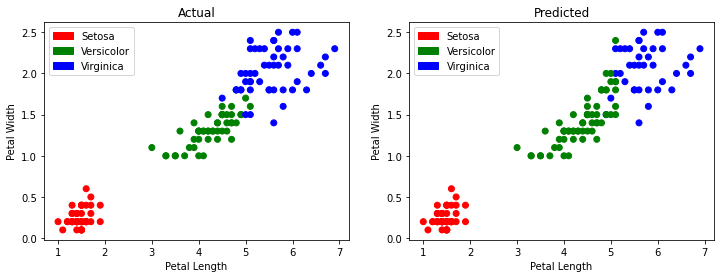

In [ ]:
plt.figure(figsize=(12,4))
colors = np.array(['red', 'green', 'blue'])

Yhat = np.choose(kmeans3.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[y['Species']])
plt.title('Actual')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[Yhat])
plt.title('Predicted')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

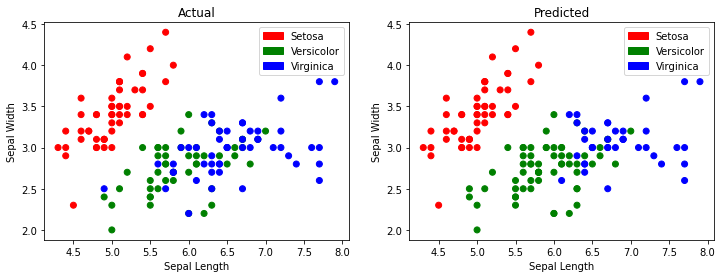

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[y['Species']])
plt.title('Actual')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[Yhat])
plt.title('Predicted')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

####Confusion Matrix

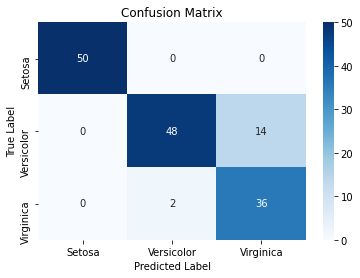

In [ ]:
cf = confusion_matrix(Yhat,y)
cat = ['Setosa', 'Versicolor', 'Virginica']
sns.heatmap(cf, cmap='Blues', annot=True, xticklabels=cat, yticklabels=cat)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()